In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citypy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# Lists for holding coords and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it's being processed (with the city number and city name).

In [96]:
responses = []
record = 1
setnum = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "Imperial"

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    query = f"{base_url}{city}&appid={weather_api_key}&units={units}"
    try:
        response = requests.get(query).json()
        city_name = response["name"]
        print(f"Processing Record {record} of Set {setnum} | {city_name}")
        
        responses.append(response)
        
        if record < 50:
            record += 1
        
        else:
            record = 1
            setnum += 1
            #time.sleep(60)
            
    except:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Zunil
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Mahajanga
Processing Record 4 of Set 1 | Guerrero Negro
Processing Record 5 of Set 1 | Vaini
Processing Record 6 of Set 1 | Zyryanka
Processing Record 7 of Set 1 | Karratha
City not found. Skipping...
Processing Record 8 of Set 1 | Kaitangata
Processing Record 9 of Set 1 | Lunca
Processing Record 10 of Set 1 | Cidreira
Processing Record 11 of Set 1 | Khatanga
Processing Record 12 of Set 1 | Naze
Processing Record 13 of Set 1 | Bethel
Processing Record 14 of Set 1 | Ahipara
Processing Record 15 of Set 1 | Port Elizabeth
Processing Record 16 of Set 1 | Jamestown
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Bluff
Processing Record 19 of Set 1 | Nabire
Processing Record 20 of Set 1 | San Cristobal
Processing Record 21 of Set 1 | Gōtsuchō
Processing Record 22 of Set 1 | Kapaa
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | Lata
Processing Record 42 of Set 4 | Svetlaya
Processing Record 43 of Set 4 | Ormara
Processing Record 44 of Set 4 | Māngrol
Processing Record 45 of Set 4 | Sechura
Processing Record 46 of Set 4 | Road Town
Processing Record 47 of Set 4 | Longyearbyen
Processing Record 48 of Set 4 | Tiznit Province
Processing Record 49 of Set 4 | Kruisfontein
Processing Record 50 of Set 4 | Bomi
Processing Record 1 of Set 5 | Klaksvík
Processing Record 2 of Set 5 | Lompoc
Processing Record 3 of Set 5 | Henties Bay
Processing Record 4 of Set 5 | Salalah
Processing Record 5 of Set 5 | Vila Franca do Campo
Processing Record 6 of Set 5 | Pevek
Processing Record 7 of Set 5 | Shahreza
Processing Record 8 of Set 5 | Mar del Plata
Processing Record 9 of Set 5 | Tvøroyri
Processing Record 10 of Set 5 | Coquimbo
City not found. Skipping...
Processing Record 11 of Set 5 | Rabo de Peixe
Processing Record 12 of Set 5 | Rawson
Processing Record 13 of Set 5 | Altay
Processing Record 14

Processing Record 29 of Set 8 | Tual
City not found. Skipping...
Processing Record 30 of Set 8 | Pangody
Processing Record 31 of Set 8 | Andros
City not found. Skipping...
Processing Record 32 of Set 8 | Erzurum Province
Processing Record 33 of Set 8 | Kununurra
Processing Record 34 of Set 8 | Itaúna
Processing Record 35 of Set 8 | Moose Factory
Processing Record 36 of Set 8 | Port Keats
Processing Record 37 of Set 8 | Akdepe
Processing Record 38 of Set 8 | Vila Velha
Processing Record 39 of Set 8 | Mount Gambier
Processing Record 40 of Set 8 | Dwārka
Processing Record 41 of Set 8 | Izazi
City not found. Skipping...
Processing Record 42 of Set 8 | Nioro
Processing Record 43 of Set 8 | Hefei
Processing Record 44 of Set 8 | Châteauroux
Processing Record 45 of Set 8 | Alta Floresta
Processing Record 46 of Set 8 | Antakya
Processing Record 47 of Set 8 | Gizo Government Station
Processing Record 48 of Set 8 | Ozernovskiy
Processing Record 49 of Set 8 | Petropavlovsk-Kamchatskiy
Processing R

Processing Record 15 of Set 12 | Khandyga
Processing Record 16 of Set 12 | Urengoy
City not found. Skipping...
Processing Record 17 of Set 12 | Port Lincoln
Processing Record 18 of Set 12 | Fortuna
Processing Record 19 of Set 12 | Povenets
Processing Record 20 of Set 12 | Peniche
------------------------------
Data Retrieval Complete
------------------------------


## Convert Raw Data to DataFrame

In [97]:
city_data = pd.DataFrame({"City": [res["name"] for res in responses],
             "Lat": [res["coord"]["lat"] for res in responses],
             "Lng": [res["coord"]["lon"] for res in responses],
             "Max Temp": [res["main"]["temp_max"] for res in responses],
             "Humidity": [res["main"]["humidity"] for res in responses],
             "Cloudiness": [res["clouds"]["all"] for res in responses],
             "Wind Speed": [res["wind"]["speed"] for res in responses],
             "Country": [res["sys"]["country"] for res in responses],
             "Date": [res["dt"] for res in responses]})

city_data.to_csv(output_data_file)

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zunil,14.7833,-91.4833,53.49,93,8,8.68,GT,1642923745
1,Albany,42.6001,-73.9662,20.73,67,100,3.94,US,1642923745
2,Mahajanga,-15.7167,46.3167,80.62,89,40,14.97,MG,1642923745
3,Guerrero Negro,27.9769,-114.0611,59.47,73,2,4.29,MX,1642923746
4,Vaini,-21.2000,-175.2000,80.76,78,20,9.22,TO,1642923746


In [98]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.894728,17.989921,50.588035,72.907018,56.535088,7.864105,1.642924e+09
std,32.295894,89.676572,30.489070,21.471282,40.673154,6.728265,8.669063e+01
min,-54.800000,-179.166700,-45.490000,10.000000,0.000000,0.000000,1.642923e+09
25%,-5.555175,-60.291025,28.967500,61.000000,11.000000,3.330000,1.642924e+09
50%,24.854500,24.287950,58.055000,77.000000,69.500000,5.840000,1.642924e+09
75%,47.771150,95.988050,75.585000,90.000000,100.000000,10.585000,1.642924e+09
max,78.218600,178.416700,100.470000,100.000000,100.000000,44.430000,1.642924e+09


## Plotting the Data

### Temperature vs. Latitude Plot

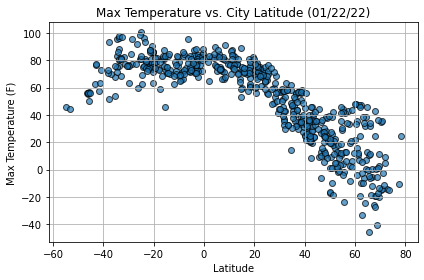

In [119]:
xs = city_data['Lat']
ys = city_data['Max Temp']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Max Temperature vs. City Latitude (01/22/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig1.png")
plt.show()

### Humidity vs. Latitude Plot

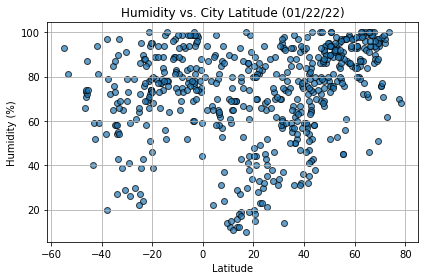

In [121]:
xs = city_data['Lat']
ys = city_data['Humidity']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Humidity vs. City Latitude (01/22/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig2.png")
plt.show()

### Cloudiness vs. Latitude Plot

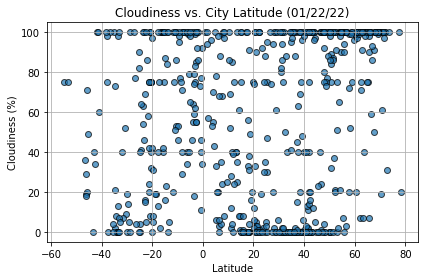

In [122]:
xs = city_data['Lat']
ys = city_data['Cloudiness']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Cloudiness vs. City Latitude (01/22/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig3.png")
plt.show()

### Wind Speed vs. Latitude Plot

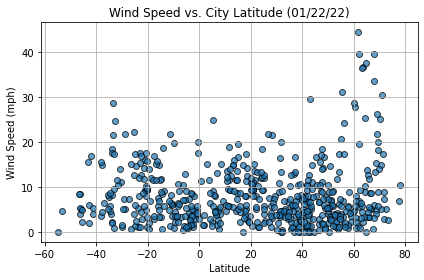

In [123]:
xs = city_data['Lat']
ys = city_data['Wind Speed']

plt.scatter(xs, ys, edgecolor='k', alpha=0.7)
plt.grid()

plt.title("Wind Speed vs. City Latitude (01/22/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [103]:
# Split Data Frame into Northern and Southern Hemispheres
north_df = city_data[city_data["Lat"] >= 0]

south_df = city_data[city_data["Lat"] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7519


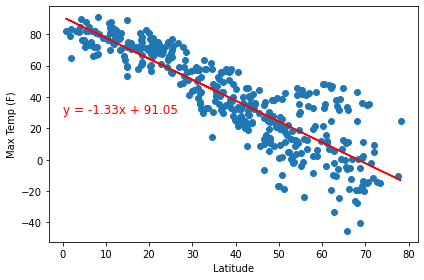

In [104]:
xs = north_df["Lat"]
ys = north_df["Max Temp"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [0, 30], fontsize=12, color='r')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.0785


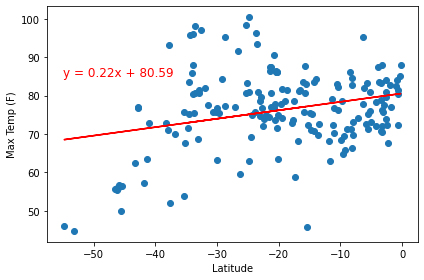

In [107]:
xs = south_df["Lat"]
ys = south_df["Max Temp"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 85], fontsize=12, color='r')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2228


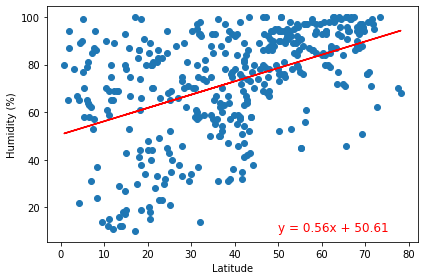

In [108]:
xs = north_df["Lat"]
ys = north_df["Humidity"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [50, 10], fontsize=12, color='r')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1036


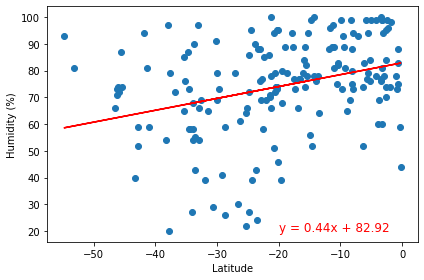

In [109]:
xs = south_df["Lat"]
ys = south_df["Humidity"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-20, 20], fontsize=12, color='r')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1163


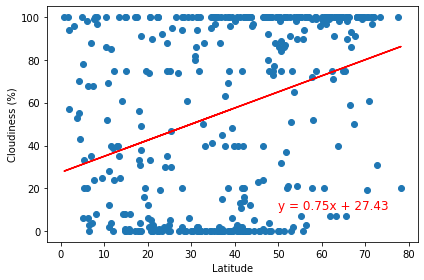

In [110]:
xs = north_df["Lat"]
ys = north_df["Cloudiness"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [50, 10], fontsize=12, color='r')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1101


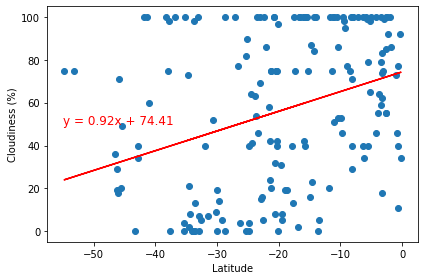

In [111]:
xs = south_df["Lat"]
ys = south_df["Cloudiness"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 50], fontsize=12, color='r')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0142


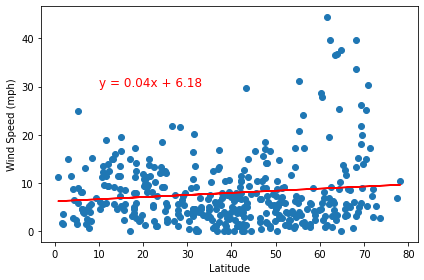

In [115]:
xs = north_df["Lat"]
ys = north_df["Wind Speed"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [10, 30], fontsize=12, color='r')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0276


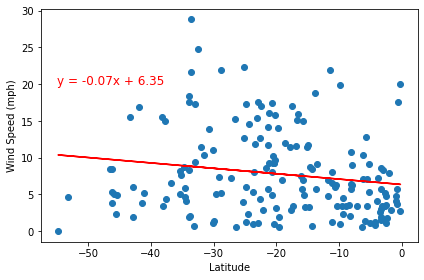

In [118]:
xs = south_df["Lat"]
ys = south_df["Wind Speed"]

# regression
(m, b, r, _, _) = linregress(xs, ys)
print(f"The r-value is: {r**2:.4f}")
regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.annotate(f"y = {round(m,2)}x + {round(b,2)}", [-55, 20], fontsize=12, color='r')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.tight_layout()
plt.show()